In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

###requests는 파이썬에서 http 요청을 보낼 때 쓸 라이브러리, BeautifulSoup는 html에서 정보를 간단하게 빼오기 위해 사용할 라이브러리

In [2]:
test_url = "http://www.gevolution.co.kr/game/get_rate_list.asp?svc=160193&m=1&p=1"
resp = requests.get(test_url)
html = BeautifulSoup(resp.content, 'html.parser')
html


<!--  앱 평가 리스트 시작 -->
<div class="subra" style="border-top:1px solid #ccc;">
<ul>
<li>
<div class="photo">
<img alt="체* 프로필 이미지" src="http://img.gevolution.co.kr/common/icon/icon_google_50x50.gif"/>
</div>
<div class="cont_wrap">
<p class="user" name="products">
<span style="font-size:12px">체*</span> <span class="level_ico score3">1</span>
<span class="time">Google play Review</span>
</p>
<p class="txt">
					저는 다른곳 갈아타려 합니다. 매수 주문을 했는데 몇시간뒤 하루가 지나지도 않았는데 체결이 되지도 않고 아무말도 없이 그냥 돈이 도로 들어왔습니다. 돈이 입금되면 됐다고 말도 없습니다. 알림 다 켜놔도 안옵니다. 그냥 별로에요 다른 문제도 많습니다.
				</p>
</div>
</li>
<li>
<div class="photo">
<img alt="H * 프로필 이미지" src="http://img.gevolution.co.kr/common/icon/icon_google_50x50.gif"/>
</div>
<div class="cont_wrap">
<p class="user" name="products">
<span style="font-size:12px">H *</span> <span class="level_ico score3">1</span>
<span class="time">Google play Review</span>
</p>
<p class="txt">
					1점 주기도 아까움 - 공인인증서 비번 8자리 초과 허용 안 됨 - 휴대폰 실명인증했음에도 아주 옛날 번호 들고옴 - 거래비밀번호 재등록 했는데, 다시 등록 요청


In [3]:
score_result = html.find('div', {'class': 'subra'})
lis = score_result.findAll('li')
lis[0]

<li>
<div class="photo">
<img alt="체* 프로필 이미지" src="http://img.gevolution.co.kr/common/icon/icon_google_50x50.gif"/>
</div>
<div class="cont_wrap">
<p class="user" name="products">
<span style="font-size:12px">체*</span> <span class="level_ico score3">1</span>
<span class="time">Google play Review</span>
</p>
<p class="txt">
					저는 다른곳 갈아타려 합니다. 매수 주문을 했는데 몇시간뒤 하루가 지나지도 않았는데 체결이 되지도 않고 아무말도 없이 그냥 돈이 도로 들어왔습니다. 돈이 입금되면 됐다고 말도 없습니다. 알림 다 켜놔도 안옵니다. 그냥 별로에요 다른 문제도 많습니다.
				</p>
</div>
</li>

In [4]:
review_text = lis[0].findAll('p')[1].getText()
review_text


'\r\n\t\t\t\t\t저는 다른곳 갈아타려 합니다. 매수 주문을 했는데 몇시간뒤 하루가 지나지도 않았는데 체결이 되지도 않고 아무말도 없이 그냥 돈이 도로 들어왔습니다. 돈이 입금되면 됐다고 말도 없습니다. 알림 다 켜놔도 안옵니다. 그냥 별로에요 다른 문제도 많습니다.\r\n\t\t\t\t'

In [5]:
review_score=lis[0].find_all('span')[1].getText()
review_score

'1'

In [9]:
customer=lis[0].find_all('span')[0].getText()
customer

'체*'

In [10]:
test_url1 = "http://www.gevolution.co.kr/game/get_rate_list.asp?svc=160193&m=1&p=1"
def get_data(url):#1페이지를 크롤링하는 메소드
    temp_list=[]
    resp = requests.get(url)
    html = BeautifulSoup(resp.content, 'html.parser')
    score_result = html.find('div', {'class': 'subra'})
    lis = score_result.findAll('li')
    for li in lis:
        review_text = li.find_all('p')[1].getText()
        review_score=li.find_all('span')[1].getText()
        customer=li.find_all('span')[0].getText()
        temp_list.append([customer,review_text,review_score])
    raw_df=pd.DataFrame(data=temp_list,columns=['Customer','Review','Score'])
    return raw_df

In [11]:
test_url2 = "http://www.gevolution.co.kr/game/get_rate_list.asp?svc=160193&m=1&p=2"

In [12]:
a=get_data(test_url1)
b=get_data(test_url2)

In [13]:
print(type(a))

<class 'pandas.core.frame.DataFrame'>


In [14]:
print(type(b))

<class 'pandas.core.frame.DataFrame'>


In [15]:
a

,Customer,Review,Score
0,체*,\r\n\t\t\t\t\t저는 다른곳 갈아타려 합니다. 매수 주문을 했는데 몇시간뒤...,1
1,H *,\r\n\t\t\t\t\t1점 주기도 아까움 - 공인인증서 비번 8자리 초과 허용 ...,1
2,KnocKnock***,\r\n\t\t\t\t\t시세포착매도기능을 한마디 사전 공지도없이 당일통보로 없앤다...,1
3,#말괄량***,\r\n\t\t\t\t\t타사 어플에서는 종목검색하면 자음하나 칠때마다 바로바로 나...,1
4,su hun ***,\r\n\t\t\t\t\t사용중에 렉이 걸립니다.빠르게 화면 전환이 시급합니다\r\...,1
5,나무**,\r\n\t\t\t\t\t아니 무슨 앱보다가 내렸다 다시 실행만 해도 렉이 걸리네요...,1
6,hyunjun ***,\r\n\t\t\t\t\t계좌연동 체크카드 만드려는데 상품코드를 입력하라는데 입력란...,1
7,민*,\r\n\t\t\t\t\t앱개발을 뭐 이따구로함? 접속후 홈버튼 누르고 나갔다가 오...,1
8,현찬*,\r\n\t\t\t\t\t계좌개설하다가 뭐 하나만 잘못되도 나갔다가 처음부터 다시....,1
9,ducs K***,\r\n\t\t\t\t\t서버오류로 취소했던게 다시 체결되어서 10%가까이 손실봤습...,1


In [16]:
b

,Customer,Review,Score
0,이건*,\r\n\t\t\t\t\t최근 들어 너무 느리다. 특히 장초반 접속이 안되고 일과중...,1
1,kj ***,\r\n\t\t\t\t\t수수료 무료라서 사용해봤는데 아주 쓰레기군요 장시작 시간은...,1
2,JIWOOK ***,\r\n\t\t\t\t\t개발자들 나가뒤져도 될만한 수준의 어플. 야 거래량터지면 ...,1
3,게임*,\r\n\t\t\t\t\t렉걸려서 주문실수가 너무 많습니다. 인터넷 문제는 아니구요...,1
4,김댕**,\r\n\t\t\t\t\t매도 매수시 버퍼링 엄청 걸림. 안될때도있음 때문에 날린돈...,1
5,Choi Sun***,\r\n\t\t\t\t\t9시 20분까지 개별잔고만 조회가능이라..완전 먹통이네 요...,1
6,우*,\r\n\t\t\t\t\t노트9 인데 로그인 누르면 팅겨 버려서 짜증나네요 ㅡㅡ 재...,1
7,DaeIn C***,\r\n\t\t\t\t\t위기에 약한 나무~ 오늘 아침 접속자 많아서 로그인도 안됨...,1
8,덕관*,\r\n\t\t\t\t\t렉이 너무 심해요. 거래해야하는데 20분째 조회가 똑바로 ...,1
9,파이*,\r\n\t\t\t\t\t어지간하면 후기안남기는데 절대깔지마라 진짜 매일 욕밖에 안...,1


In [17]:
pd.concat([a,b],ignore_index=True)

,Customer,Review,Score
0,체*,\r\n\t\t\t\t\t저는 다른곳 갈아타려 합니다. 매수 주문을 했는데 몇시간뒤...,1
1,H *,\r\n\t\t\t\t\t1점 주기도 아까움 - 공인인증서 비번 8자리 초과 허용 ...,1
2,KnocKnock***,\r\n\t\t\t\t\t시세포착매도기능을 한마디 사전 공지도없이 당일통보로 없앤다...,1
3,#말괄량***,\r\n\t\t\t\t\t타사 어플에서는 종목검색하면 자음하나 칠때마다 바로바로 나...,1
4,su hun ***,\r\n\t\t\t\t\t사용중에 렉이 걸립니다.빠르게 화면 전환이 시급합니다\r\...,1
5,나무**,\r\n\t\t\t\t\t아니 무슨 앱보다가 내렸다 다시 실행만 해도 렉이 걸리네요...,1
6,hyunjun ***,\r\n\t\t\t\t\t계좌연동 체크카드 만드려는데 상품코드를 입력하라는데 입력란...,1
7,민*,\r\n\t\t\t\t\t앱개발을 뭐 이따구로함? 접속후 홈버튼 누르고 나갔다가 오...,1
8,현찬*,\r\n\t\t\t\t\t계좌개설하다가 뭐 하나만 잘못되도 나갔다가 처음부터 다시....,1
9,ducs K***,\r\n\t\t\t\t\t서버오류로 취소했던게 다시 체결되어서 10%가까이 손실봤습...,1


In [18]:
test_url = "http://www.gevolution.co.kr/game/get_rate_list.asp?svc=160193&m=1&p="
#100페이지를 크롤링하는 함수
def Mycrawl(page):
    for i in range(1,page):
        if(i==1):
            addr=test_url+str(i)
            xdata=get_data(addr)
            ydata=get_data(addr+str(i+1))
            zdata=pd.concat([xdata,ydata])
        else:
            ydata=get_data(addr+str(i+1))
            zdata=pd.concat([zdata,ydata],ignore_index=True)
    return zdata
        #get_data(addr)[1]
        #newtemp_list=a.append(get_data(addr))
    #return newtemp_list

In [26]:
Mycrawl(3)

,Customer,Review,Score
0,체*,\r\n\t\t\t\t\t저는 다른곳 갈아타려 합니다. 매수 주문을 했는데 몇시간뒤...,1
1,H *,\r\n\t\t\t\t\t1점 주기도 아까움 - 공인인증서 비번 8자리 초과 허용 ...,1
2,KnocKnock***,\r\n\t\t\t\t\t시세포착매도기능을 한마디 사전 공지도없이 당일통보로 없앤다...,1
3,#말괄량***,\r\n\t\t\t\t\t타사 어플에서는 종목검색하면 자음하나 칠때마다 바로바로 나...,1
4,su hun ***,\r\n\t\t\t\t\t사용중에 렉이 걸립니다.빠르게 화면 전환이 시급합니다\r\...,1
5,나무**,\r\n\t\t\t\t\t아니 무슨 앱보다가 내렸다 다시 실행만 해도 렉이 걸리네요...,1
6,hyunjun ***,\r\n\t\t\t\t\t계좌연동 체크카드 만드려는데 상품코드를 입력하라는데 입력란...,1
7,민*,\r\n\t\t\t\t\t앱개발을 뭐 이따구로함? 접속후 홈버튼 누르고 나갔다가 오...,1
8,현찬*,\r\n\t\t\t\t\t계좌개설하다가 뭐 하나만 잘못되도 나갔다가 처음부터 다시....,1
9,ducs K***,\r\n\t\t\t\t\t서버오류로 취소했던게 다시 체결되어서 10%가까이 손실봤습...,1


In [20]:
import sqlite3
import requests
from bs4 import BeautifulSoup
import sqlite3
from konlpy.tag import *
from konlpy.utils import pprint

import pandas as pd

In [33]:
test_url = "http://www.gevolution.co.kr/game/get_rate_list.asp?svc=160193&m=1&p="
df=Mycrawl(9)

In [34]:
print(df.shape)

(90, 3)


In [35]:
df.head()
df.tail()

,Customer,Review,Score
85,황주*,\r\n\t\t\t\t\t신분증 등록시 촬영버튼을 눌러도 촬영이 안되는 불편이 있음...,1
86,누구나하***,\r\n\t\t\t\t\t3.2 짜리로 표기해놓고 3.4 있어도 안사지더만 실제 수...,1
87,홍성*,\r\n\t\t\t\t\t차트설정 오류 및 검색기능이나 모든것이 불편함\r\n\t\...,1
88,ㄱㄴ*,\r\n\t\t\t\t\t회원가입시 휴대폰번호 입력란이 클릭되지 않아 번호입력이 불...,1
89,박성*,\r\n\t\t\t\t\t폰에서 뒤로가가 버튼 누르면바로 종료화면 창뜨게해주세요 종...,1


In [36]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [37]:
from wordcloud import WordCloud 
import matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
import matplotlib.font_manager as fm
font_location = 'malgun.ttf'  
#C:\\Users\\Administrator\\Documents\\asiasummer\\webdata\\
font_name = fm.FontProperties(fname = font_location).get_name()
matplotlib.rc('font', family = font_name)

print(font_name)

Malgun Gothic


In [38]:
alpha=str(df['Review'])

In [48]:
w = WordCloud(
    font_path = 'malgun.ttf',
    width = 3000,
    height = 3000,
    stopwords=['t','/','r','n',"자꾸","진짜","아니","t아니","다시"],background_color="white"
)
w=w.generate(alpha)


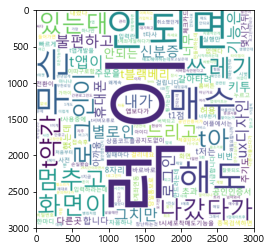

In [50]:
plt.imshow(w,interpolation='bilinear')